# `pc_curve`
This single method can convert either (a) images containing invasion size or (b) invasion pressure results, such as those produced by ``porosimetry`` and ``drainage``, respectively.  

In [2]:
import porespy as ps
import numpy as np
import matplotlib.pyplot as plt

Generate an image and apply the ``drainage`` function:

In [4]:
np.random.seed(0)
im = ps.generators.blobs(shape=[200, 200], porosity=0.6)
pc = ps.filters.capillary_transform(im, sigma=0.01, theta=180, voxel_size=1e-5)
drn = ps.simulations.drainage(im, return_sizes=True)

## `pc`
The function can accept an image of invasion pressures, such as that produced by `drainage` or `qbip`:

In [13]:
pc_curve = ps.metrics.pc_curve(im=im, pc=drn.im_pc)

The function returns an object with `pc` and `snwp` as attributes which can be plotted directly:

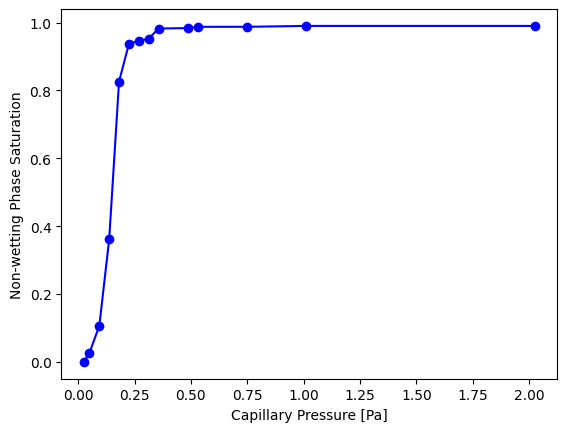

In [14]:
plt.plot(pc_curve.pc, pc_curve.snwp, 'b-o')
plt.xlabel('Capillary Pressure [Pa]')
plt.ylabel('Non-wetting Phase Saturation');

Alternatively, if the size map is available but not the capillary pressure map, then `size_to_pc` can be used first:

In [15]:
pc = ps.filters.size_to_pc(im=im, size=drn.im_size, sigma=0.01, theta=180, voxel_size=1e-5)
data = ps.metrics.pc_curve(im=im, pc=pc)

Matplotlib can be used to plot the curve:

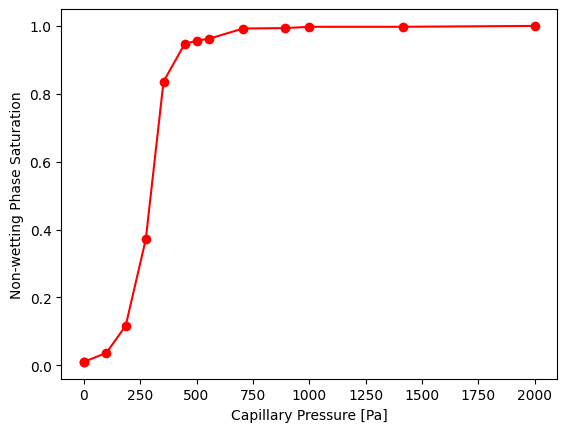

In [16]:
plt.plot(data.pc, data.snwp, 'r-o')
plt.xlabel('Capillary Pressure [Pa]')
plt.ylabel('Non-wetting Phase Saturation');